#  Atividade prática aula 05 <h1>
    Aluno: Kristtopher Kayo Coelho \par
    Matrícula: ES95031

A atividade consiste em apresentar um exemplo completo para análise do coeficiente de correlação e demais métricas.
A base de dados escolhida para tal tarefa, representa as despesas mensais com alimentação. Obviamente os valores dependem de vários fatores, tais como a dimensão do agregado familiar, os gastos dos elementos
do agregado, além do rendimento. Portanto, recolheu-se informação sobre oito famílias. Os resultados obtidos foram os seguintes:

| Rendimento/BRL(x) | Despesas/BRL(y) |
|------------------|----------------|
| 1700             | 430            |
| 2250             | 500            |
| 950              | 200            |
| 2800             | 550            |
| 750              | 170            |
| 1400             | 410            |
| 2600             | 540            |
| 3000             | 600            |

# Importando Bibliotecas

In [1]:
import numpy as np
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preparando os dados

In [2]:
data = pd.read_excel('data.xlsx')
X = data['Rendimento/BRL(x)']
Y = data['Despesas/BRL(y)']
xy = np.array(X,Y)
data


,Rendimento/BRL(x),Despesas/BRL(y)
0,1700,430
1,2250,500
2,950,200
3,2800,550
4,750,170
5,1400,410
6,2600,540
7,3000,600


# Avaliando o coeficiente de correlação da amostra
Os passos seguintes só são possíveis de calcular e avaliar caso a amostra bivariada tenha coeficiente de correlação forte (positivo ou negativo)

In [3]:
data.corr()

,Rendimento/BRL(x),Despesas/BRL(y)
Rendimento/BRL(x),1.000000,0.959293
Despesas/BRL(y),0.959293,1.000000


## Conclusões sobre o coeficiente de correlação
O coeficiente de correlação apresenta valor de aproximadamente 0.96, ou seja, próximo de um positivo, indicando que à medida que a renda cresce também crescem as despesas (em média).

# Estimativa de parâmetros, verificação da qualidade e cálculo dos erros

## Estimar parametros B1 e B0

In [4]:
x = sm.add_constant(X)
model = sm.OLS(Y,x)
results = model.fit()

In [5]:
b0 = results.params['const']
b0

77.33507630570932

In [6]:
b1 = float(results.params['Rendimento/BRL(x)'])
b1

0.1800206724630632

In [7]:
print('Modelo linear: Despesas/BRL= {:0.4f} + {:0.4f}(Rendimento/BRL)'.format(b0,b1))

Modelo linear: Despesas/BRL= 77.3351 + 0.1800(Rendimento/BRL)


## Cálculo dos erros

### Y estimado

In [8]:
estimate_y = b0+b1*X
estimate_y

0    383.370219
1    482.381589
2    248.354715
3    581.392959
4    212.350581
5    329.364018
6    545.388825
7    617.397094
Name: Rendimento/BRL(x), dtype: float64

### Erro

In [9]:
e = Y - estimate_y
e

0    46.629781
1    17.618411
2   -48.354715
3   -31.392959
4   -42.350581
5    80.635982
6    -5.388825
7   -17.397094
dtype: float64

### Erro$^2$

In [10]:
e**2

0    2174.336430
1     310.408394
2    2338.178477
3     985.517887
4    1793.571682
5    6502.161633
6      29.039432
7     302.658869
dtype: float64

## Verificar a qualidade do estimador

In [11]:
print('Conclusão: O modelo explica {:0.2f}% da variação'.format(results.rsquared*100))

Conclusão: O modelo explica 92.02% da variação


# Desvio padrão dos erros e dos parâmetros

## Sb0

In [12]:
Sb0 = results.bse['const']
Sb0

45.24045147331449

## Sb1

In [13]:
Sb1 = results.bse['Rendimento/BRL(x)']
Sb1

0.021636028315753723

# Cálculo do intervalo de confiança dos parâmetros para diferentes níveis de confiança

## 90\%

In [14]:
nc = 0.90
t = stats.t.ppf((nc+1)/2,len(X))
interval_b0 = [(b0 - t * Sb0),(b0 + t * Sb0)]
interval_b0

[-6.791716448140008, 161.46186905955864]

Como o intervalo de confiança inclui zero, a hipótese de que esses parâmetros são zero não pode ser rejeitada no nível de significância 0.1. Portanto, b0 é essencialmente zero.

In [15]:
interval_b1 = [(b1 - t * Sb1),(b1 + t * Sb1)]
interval_b1

[0.13978743846871472, 0.22025390645741166]

Como o intervalo de confiança não inclui zero, a inclinação b1 é significativamente diferente de zero neste nível de confiança.

## 95\%

In [16]:
nc = 0.95
t = stats.t.ppf((nc+1)/2,len(X))
interval_b0 = [(b0 - t * Sb0),(b0 + t * Sb0)]
interval_b0

[-26.989591862530418, 181.65974447394905]

Como o intervalo de confiança inclui zero, a hipótese de que esses parâmetros sejam zero não pode ser rejeitada no nível de significância 0,1. Portanto, b0 é essencialmente zero., a hipótese de que esses parâmetros são zero não pode ser rejeitada no nível de significância 0.05. Portanto, b0 é essencialmente zero.

In [17]:
interval_b1 = [(b1 - t * Sb1),(b1 + t * Sb1)]
interval_b1

[0.130127901701236, 0.22991344322489038]

Como o intervalo de confiança não inclui zero, a inclinação b1 é significativamente diferente de zero neste nível de confiança.

## 99\%

In [18]:
nc = 0.99
t = stats.t.ppf((nc+1)/2,len(X))
interval_b0 = [(b0 - t * Sb0),(b0 + t * Sb0)]
interval_b0

[-74.46416143165337, 229.134314043072]

Como o intervalo de confiança inclui zero, a hipótese de que esses parâmetros são zero não pode ser rejeitada no nível de significância 0.01. Portanto, b0 é essencialmente zero.

In [19]:
interval_b1 = [(b1 - t * Sb1),(b1 + t * Sb1)]
interval_b1

[0.10742341715201252, 0.25261792777411385]

Como o intervalo de confiança não inclui zero, a inclinação b1 é significativamente diferente de zero neste nível de confiança.

# Testes Visuais de Pressupostos

## Linearidade:

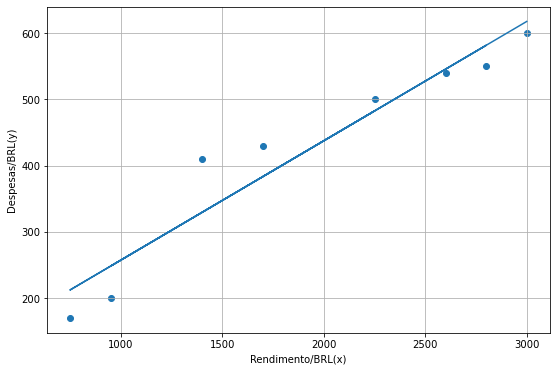

In [20]:
figure = plt.figure(figsize=(9,6))
plt.scatter(data['Rendimento/BRL(x)'], data['Despesas/BRL(y)'])
plt.xlabel('Rendimento/BRL(x)')
plt.ylabel('Despesas/BRL(y)')
plt.grid(b=None)
m, b = np.polyfit(data['Rendimento/BRL(x)'], data['Despesas/BRL(y)'], 1)
plt.plot(data['Rendimento/BRL(x)'], m*data['Rendimento/BRL(x)'] + b)

Os dados plotados se aproximam da reta linear, portanto podem ser representados por uma equação linear que represente o comportamento da amostra.

## Independência dos erros:

Text(0, 0.5, 'ε$_i$')

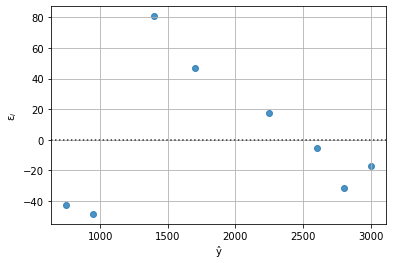

In [21]:
plt.grid(b=None)
sns.residplot(data['Rendimento/BRL(x)'], data['Despesas/BRL(y)'])
plt.xlabel('ŷ')
plt.ylabel('ε$_i$')

Não existe tendencia ao espalamento, portanto é vericifada a homocedasticidade dos dados.

## Erros normais

((array([-1.38519806, -0.83757156, -0.46579419, -0.15039337,  0.15039337,
          0.46579419,  0.83757156,  1.38519806]),
  array([ 750,  950, 1400, 1700, 2250, 2600, 2800, 3000])),
 (927.9879494197563, 1931.25, 0.9789557212926476))

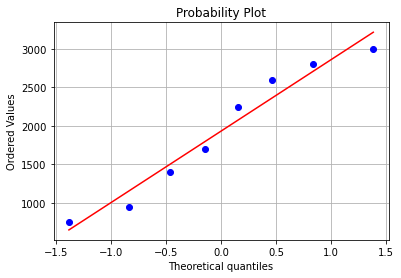

In [22]:
plt.grid(b=None)
stats.probplot(xy, dist="norm", plot=pylab)

Os pontos plotados se aproximam da reta da normal, portanto os erros são normais